In [1]:
%matplotlib inline

import sympy as sy 
import numpy as np
import math 

sy.init_printing(use_latex='mathjax')

In [7]:
x_1, x_2 = sy.symbols('x_1 x_2')
y = x_1 ** 3 + x_2 ** 3 + 2 * x_1 ** 2 + 3 * x_2 ** 2 - x_1 * x_2 + 2 * x_1 + 4 * x_2

#Jacobian / gradient vector 
x1_diff = sy.diff(y, x_1)
x2_diff = sy.diff(y, x_2)

#lamdify
f_f1_diff = sy.lambdify((x_1, x_2), x1_diff, 'numpy')
f_f2_diff = sy.lambdify((x_1, x_2), x2_diff, 'numpy')

np.array([f_f1_diff(1,2), f_f2_diff(1,2)])

array([ 7, 27])

In [14]:
# hessian 은 대칭행렬 
x1_x1_diff = sy.diff(y, x_1, x_1)
x1_x2_diff = sy.diff(y, x_1, x_2)
x2_x1_diff = sy.diff(y, x_2, x_1)
x2_x2_diff = sy.diff(y, x_2, x_2)

f_00_diff = sy.lambdify((x_1, x_2), x1_x1_diff , 'numpy')
f_01_diff = sy.lambdify((x_1, x_2), x1_x2_diff , 'numpy')
f_02_diff = sy.lambdify((x_1, x_2), x2_x1_diff , 'numpy')
f_03_diff = sy.lambdify((x_1, x_2), x2_x2_diff , 'numpy')

np.array([[f_00_diff(1,2),f_01_diff(1,2)],[f_02_diff(1,2),f_03_diff(1,2)]])

array([[10, -1],
       [-1, 18]])

In [26]:
from sympy.functions import sin, cos, ln 
plt.style.use("ggplot")

def factorial(n): 
    if n <= 0 :
        return 1 
    else:
        return n * factorial(n-1)

# x = sy.Symbol('x') Symbolize 해줘야 된 다는 것을 함수안에 표기한듯.
def taylor(function, x0, n , x = sy.Symbol('x')):
    i, p = 0, 0
    while i <= n : 
        p += function.diff(x,i).subs(x,x0) / factorial(i) * (x - x0) ** i
        i += 1
    return p

#Graph 
def plot(f, x0 = 0, n = 9, by = 2, x_lims = [-10, 10], y_lims = [-10, 10], npoints = 800, x = sy.Symbol('x')):
    x1 = np.linspace(x_lims[0], x_lims[1], npoints)
    # x=0 에서(맥클로린) 차수를 올려가며 테일러 급수로 근사한 그래프 그리기
    for j in range(1, n + 1, by):
        func = taylor(f, x0, j)
        taylor_lambda = sy.lambdify(x, func, "numpy")
        print('Taylor expansion at n=' + str(j), func)
        plt.plot(x1, taylor_lambda(x1), label = 'Order '+ str(j))
        
    # 실제 함수 그래프
    func_lambda = sy.lambdify(x, f, "numpy")
    plt.plot(x1, func_lambda(x1), label = 'f(x)', color = 'black', linestyle = '--')
    
    plt.xlim(x_lims)
    plt.ylim(y_lims)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.title('Taylor series approximation')
    plt.show()

In [27]:
x = sy.symbols('x')
sy.simplify(taylor(x**4, 2, 2))

    2            
24⋅x  - 64⋅x + 48

Taylor expansion at n=1 x
Taylor expansion at n=3 -x**3/6 + x
Taylor expansion at n=5 x**5/120 - x**3/6 + x
Taylor expansion at n=7 -x**7/5040 + x**5/120 - x**3/6 + x
Taylor expansion at n=9 x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x


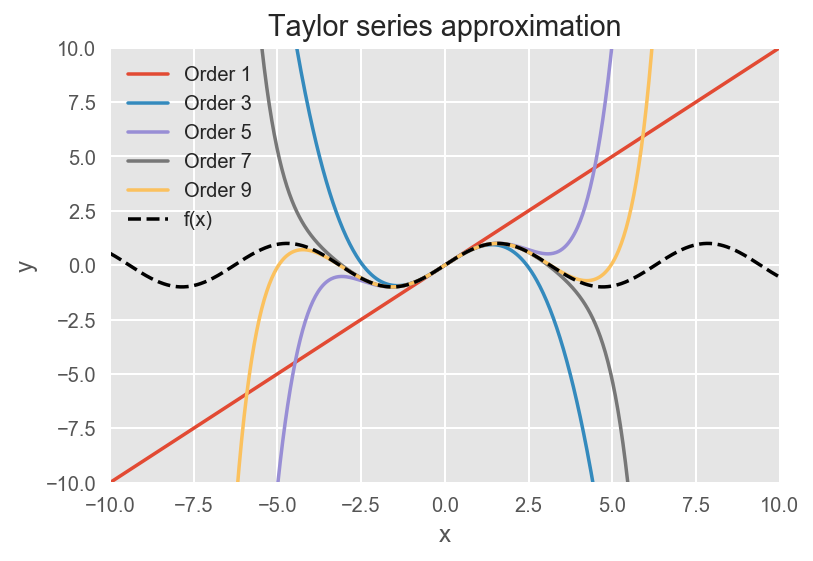

In [33]:
x = sy.Symbol('x')
# f = ln(1 + x)
f = sin(x)
plot(f)

### 수치 알고리즘 일반개념 

- 최적화 수치 알고리즘은 일반적으로 다음 단계를 따름 

    - 단계 1. 타당성 있는 출발점 $\mathbf{x}^{(0)}$ 추정, $k=0$
    - 단계 2. 탐색방향 $\mathbf{d}^{(k)}$ 를 계산 
    - 단계 3. 수렴 검토 
        - 지역 최소를 위한 1계 필요조건 
$$
\color{Red}{f'(x^*) = 0}
$$
        - 또한 추가적으로 x* 에서 함수를 두번 미분한 결과값도 양수 / convex 하기 때문  ${f"(x)} > 0$ : Convex
        - 필요조건을 만족시킨다면 그점은 
            - 지역 최소
            - 지역 최대
            - 변곡점 
    - 단계 4. 양의 이동거리 $\alpha_k$ 계산
    - 단계 5. 새로운 설계 변수 계산 $\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} + \alpha_k \mathbf{d}^{(k)}$, $k=k+1$
        - $\alpha_k$ : step size 
        - $\mathbf{d}^{(k)}$ : gradient vector
- 따라서 $\alpha_k$ 와 $\mathbf{d}^{(k)}$ 의 계산이 중요     

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy

style_name = 'bmh' #bmh
mpl.style.use(style_name)
np.set_printoptions(precision=4, linewidth =150)

style = plt.style.library[style_name]
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

sympy.init_printing()

#### 경사도 수치계산 실습

$$
\mu = 0,\; \sigma^2 = 0.2\\
f(x) = {\frac{1}{\sigma\sqrt{2\pi}}}exp\left(-{\frac{(x - \mu)^2}{2\sigma^2}}\right)
$$

In [35]:
import math

In [36]:
x = sympy.symbols('x')
m, s2 = 0, 0.2
s1 = sympy.sqrt(s2)
f = 1/ (s1*(sympy.sqrt(2*np.pi))) * sympy.exp(-1*(x-m)**2 / (2*s2))
sympy.diff(f,x)

In [37]:
x = sympy.symbols('x')
m, s2 = 0, 0.2
s1 = sympy.sqrt(s)
f = 1/sympy.sqrt(2*np.pi*s2) * sympy.exp(-1*(x-m)**2 / (2*s2))
sympy.diff(f,x)

NameError: name 's' is not defined

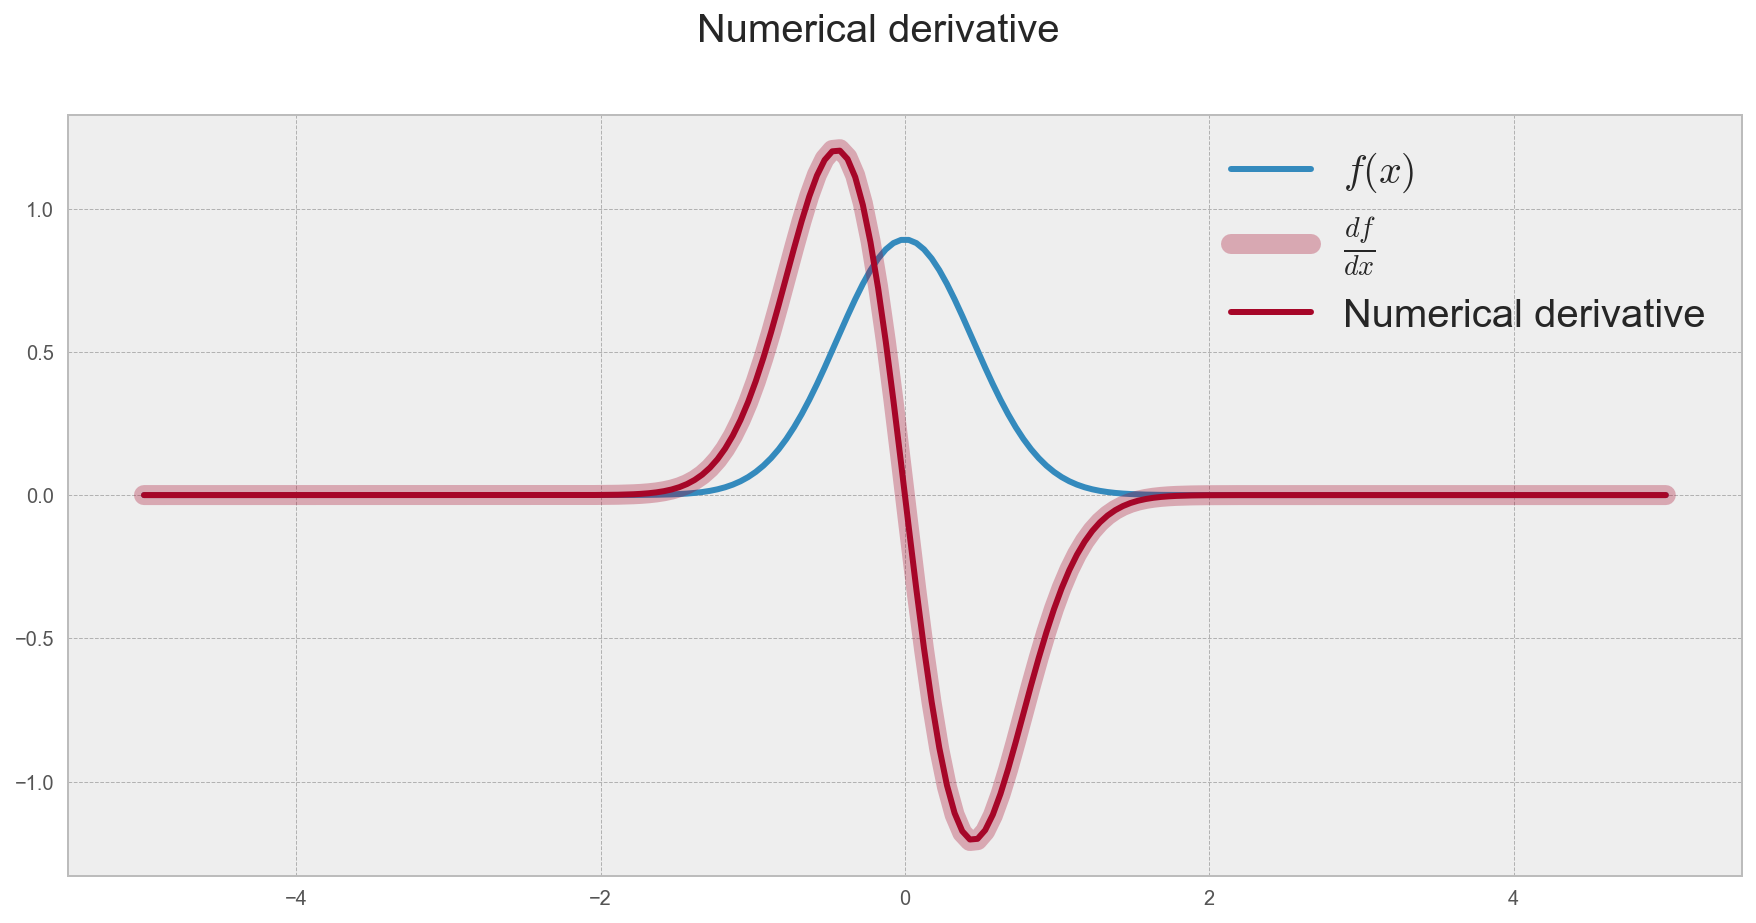

In [38]:
plt.rcParams["figure.figsize"] = (15,7)

def f(x):
    """
    실습용 함수 정의
    """
    m, s2 = 0, 0.2
    return 1/ (s1*(np.sqrt(2*np.pi))) * np.exp(-1*(x-m)**2 / (2*s2))
def df_anal(x):
    """
    sympy의 결과로 얻은 도함수
    """
    return -4.46031029038193*x*np.exp(-2.5*x**2)

def df_numer(x):
    """
    중앙차분법 오차 시각화
    """
    h = 0.1
    return (f(x+0.5*h) - f(x-0.5*h)) / h

def df_numer2(x):
    """
    전방 오차 시각화하기
    """
    h = 0.1
    return (f(x+h) - f(x)) / h

def df_numer3(x):
    """
    후방, 중앙차분법 오차 시각화하기
    """
    h = 0.1
    return (f(x) - f(x-h)) / h

x = np.linspace(-5, 5, 200)

plt.plot(x, f(x), lw=3, color=style_colors[0], label=r"$f(x)$")
plt.plot(x, df_anal(x), lw=10, color=style_colors[1], alpha=0.3 , label=r"$\frac{df}{dx}$")
plt.plot(x, df_numer(x), color=style_colors[1], lw=3, label=r"Numerical derivative")
# plt.plot(x, df_numer2(x), color=style_colors[2], lw=3, label=r"Numerical derivative")
# plt.plot(x, df_numer3(x), color=style_colors[3], lw=3, label=r"Numerical derivative")
plt.legend(fontsize=20)

plt.suptitle("Numerical derivative", fontsize=20)
plt.show()

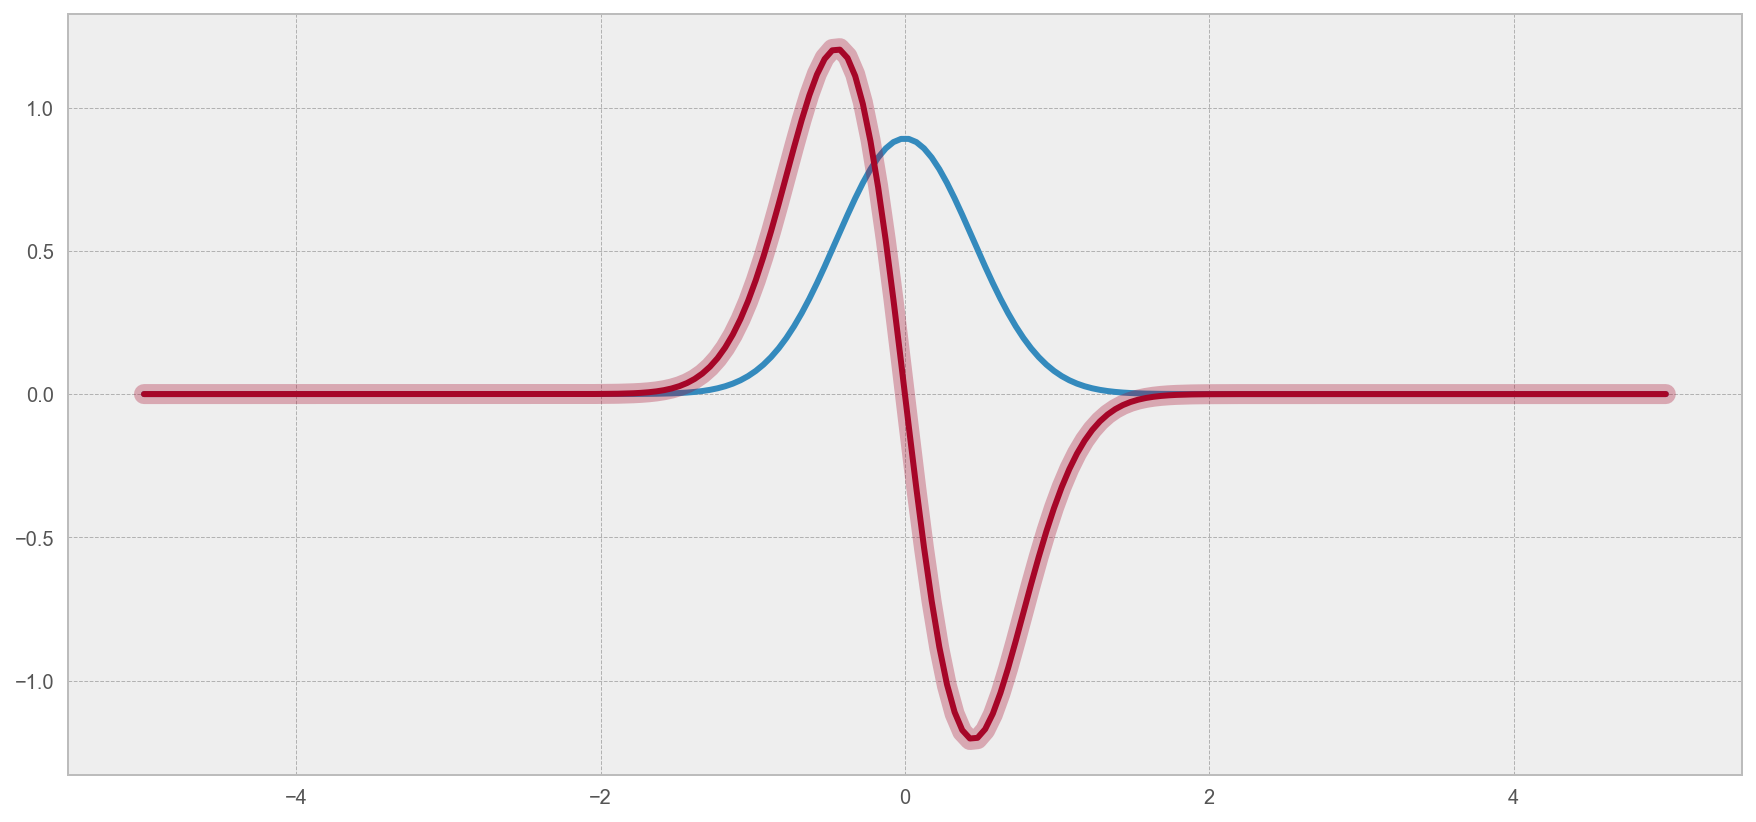

In [39]:
#중앙차분법
plt.plot(x, f(x), lw=3, color=style_colors[0], label=r"$f(x)$")
plt.plot(x, df_anal(x), lw=10, color=style_colors[1], alpha=0.3 , label=r"$\frac{df}{dx}$")
plt.plot(x, df_numer(x), color=style_colors[1], lw=3, label=r"Numerical derivative")

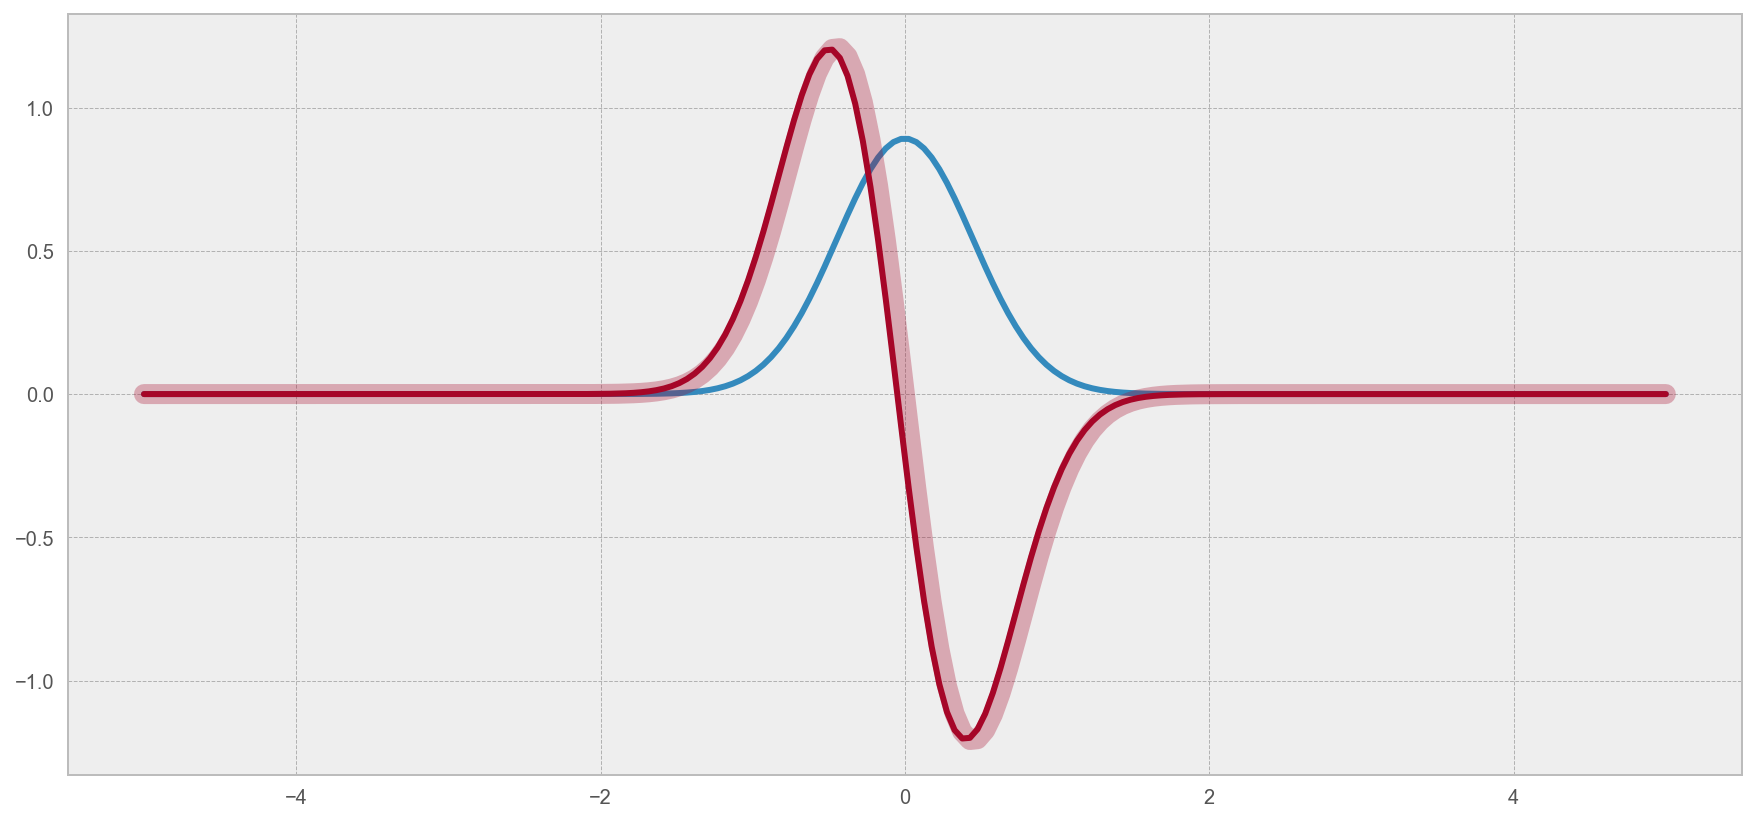

In [40]:
#전방차분법
plt.plot(x, f(x), lw=3, color=style_colors[0], label=r"$f(x)$")
plt.plot(x, df_anal(x), lw=10, color=style_colors[1], alpha=0.3 , label=r"$\frac{df}{dx}$")
plt.plot(x, df_numer2(x), color=style_colors[1], lw=3, label=r"Numerical derivative")

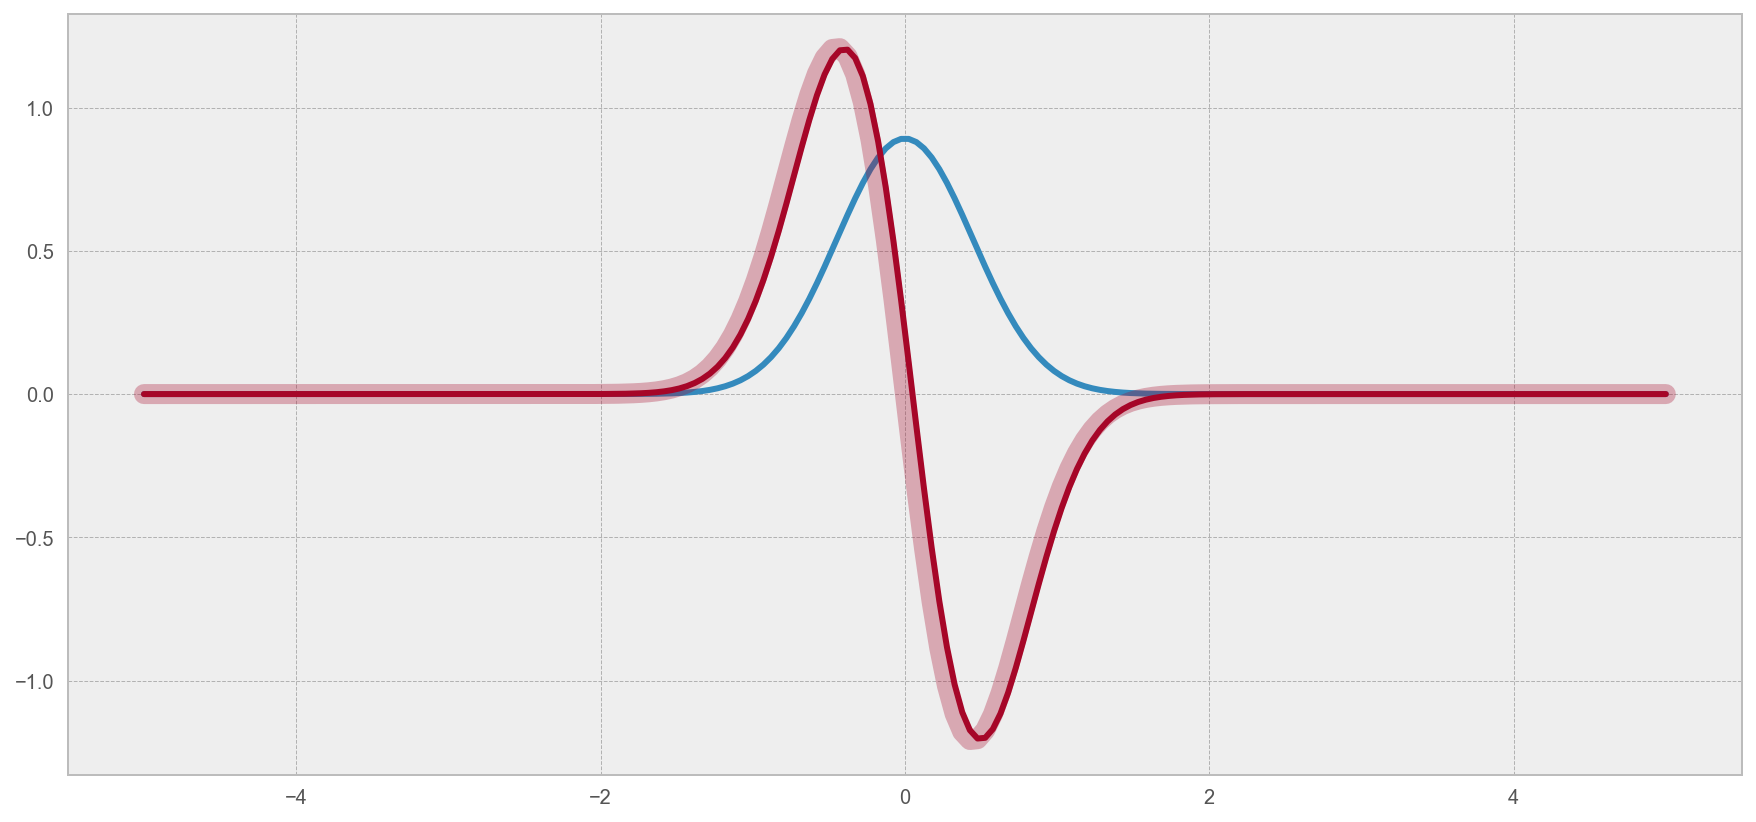

In [41]:
#후방차분법
plt.plot(x, f(x), lw=3, color=style_colors[0], label=r"$f(x)$")
plt.plot(x, df_anal(x), lw=10, color=style_colors[1], alpha=0.3 , label=r"$\frac{df}{dx}$")
plt.plot(x, df_numer3(x), color=style_colors[1], lw=3, label=r"Numerical derivative")

In [42]:
def f(x):
    m, v =0, 0.2
    s = np.sqrt(v)
    return 1 / (s * np.sqrt(2 * np.pi)) * np.exp(-1*(x - m) ** 2 / (2 * v))

def df_anal(x):
    """
    sympy의 결과로 얻은 도함수
    """
    return  -1 * 4.46031029038193 * x * np.exp(-1 * 2.5 * x ** 2)

def df_numer(x):
    """
    수치적으로 도함수의 값을 계산하는 함수
    전방, 후방, 중앙차분법 오차 시각화하기
    """
    h = 0.1
    #result = (f(x+h) - f(x)) / h
    #result = (f(x) - f(x-h)) / h
    return (f(x+h/2) - f(x-h/2)) / h

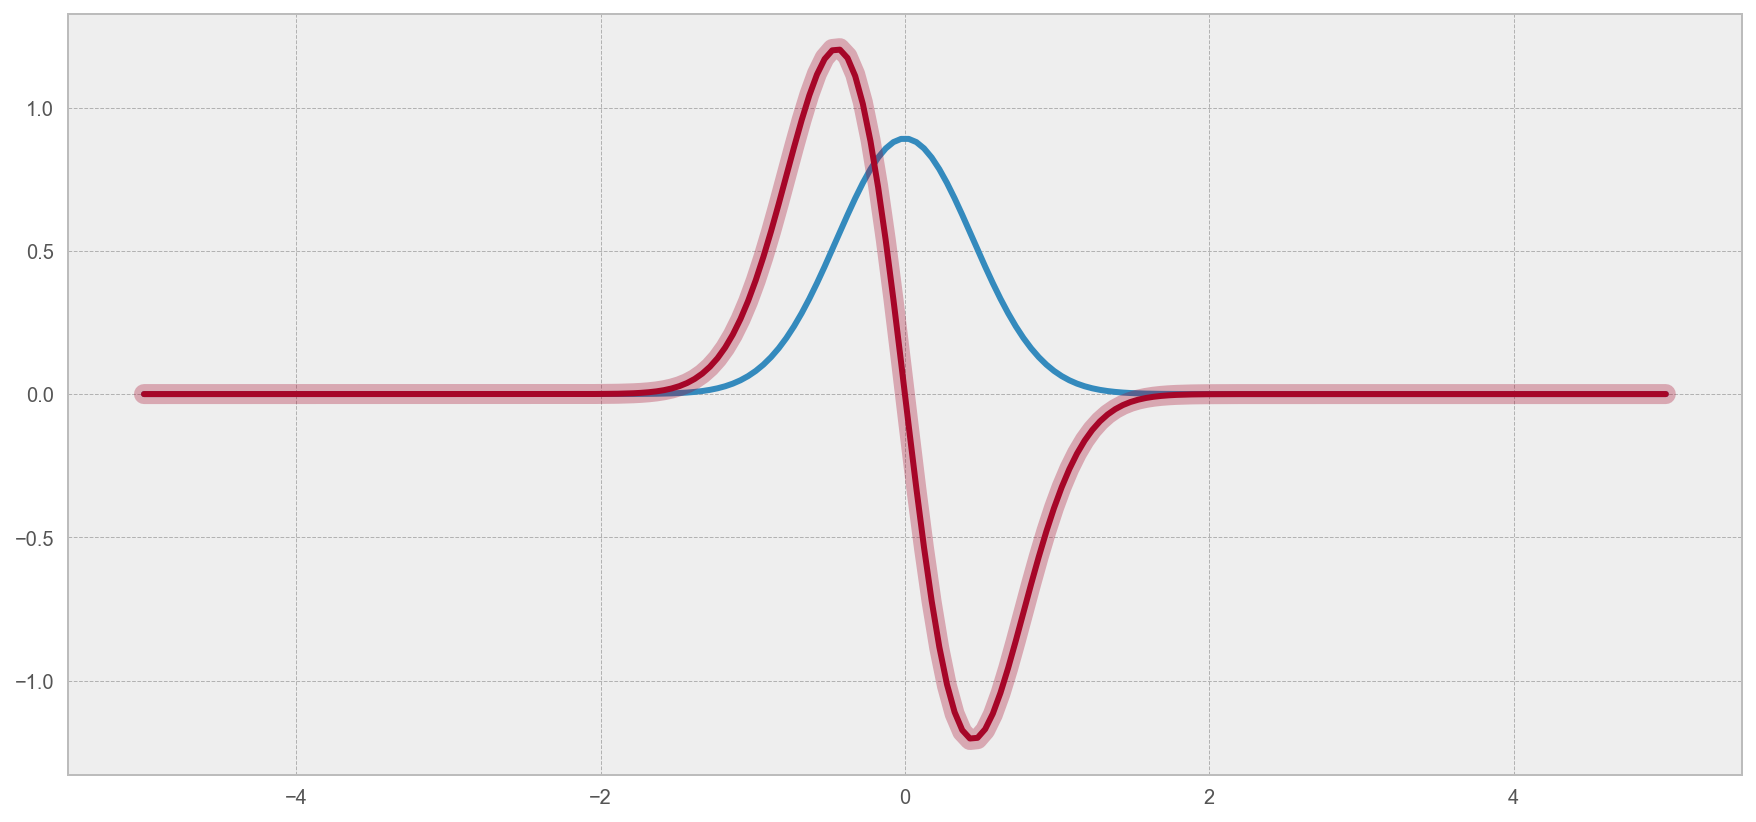

In [43]:
x = np.linspace(-5, 5, 200)

plt.plot(x, f(x), lw=3, color=style_colors[0], label=r"$f(x)$")
plt.plot(x, df_anal(x), lw=10, color=style_colors[1], alpha=0.3 , label=r"$\frac{df}{dx}$")
plt.plot(x, df_numer(x), color=style_colors[1], lw=3, label=r"Numerical derivative")